 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Set the file path
whale_returns = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/whale_returns.csv")
algo_returns = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/algo_returns.csv")
sp_tsx_history = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/sp_tsx_history.csv")

In [3]:
# Create a Pandas DataFrame from a csv file
whale_ret_df = pd.read_csv(whale_returns,index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_ret_df = pd.read_csv(algo_returns, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp_tsx_history_df = pd.read_csv(sp_tsx_history, thousands=' ', index_col="Date", infer_datetime_format=True, parse_dates=True)

In [4]:
# Reading whale returns
whale_ret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_ret_df = whale_ret_df.dropna().copy()
whale_ret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_ret_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [8]:
# Count nulls
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_ret_df = algo_ret_df.dropna().copy()
algo_ret_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
# Check Data Types
sp_tsx_history_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace("$", "")
sp_tsx_history_df['Close'] = sp_tsx_history_df['Close'].str.replace(',', '').astype(float)
sp_tsx_history_df.apply(pd.to_numeric)
sp_tsx_history_df.head()

/Users/kiransohi/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [13]:
# Calculate Daily Returns
sp_tsx_ret = sp_tsx_history_df.pct_change()
sp_tsx_ret.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [14]:
# Drop nulls
sp_tsx_ret = sp_tsx_ret.dropna().copy()

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_ret.rename(columns={'Close':'SP_TSX'}, inplace=True)
sp_tsx_ret.head()

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_ret_df, algo_ret_df, sp_tsx_ret], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df = combined_df.sort_index()

# Set column names
combined_df.columns = ["SOROS", "PAULSON", "TIGER", "BERKSHIRE", "ALGO_1", "ALGO_2", "SP_TSX"]

# Display a few rows
combined_df.head(20)

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO_1,ALGO_2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.014321
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,0.006655
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.002139
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.002655


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

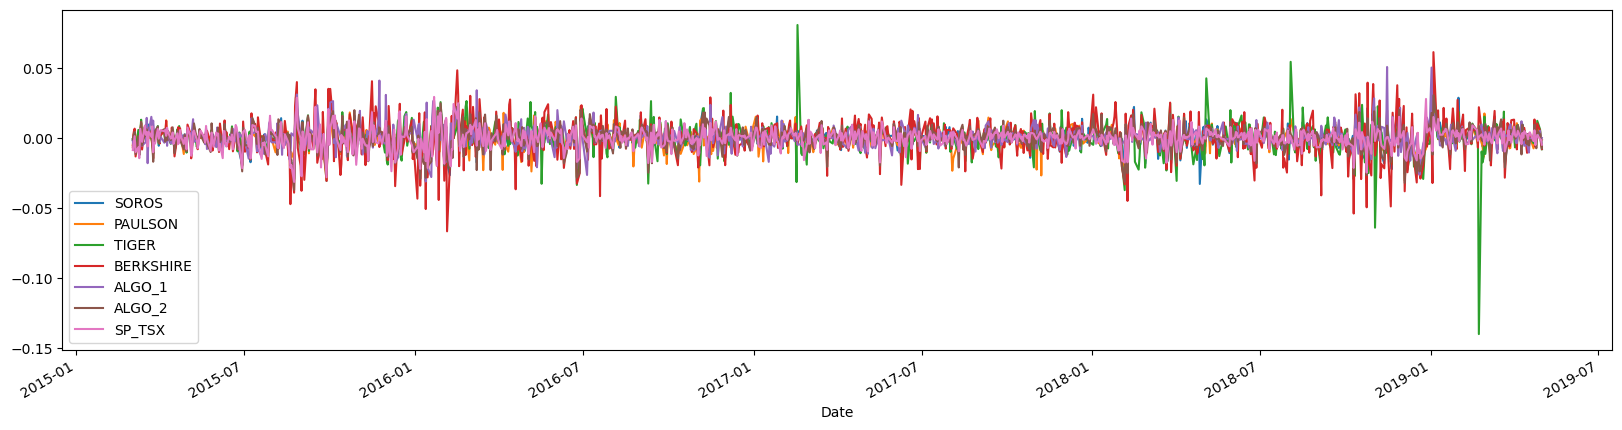

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

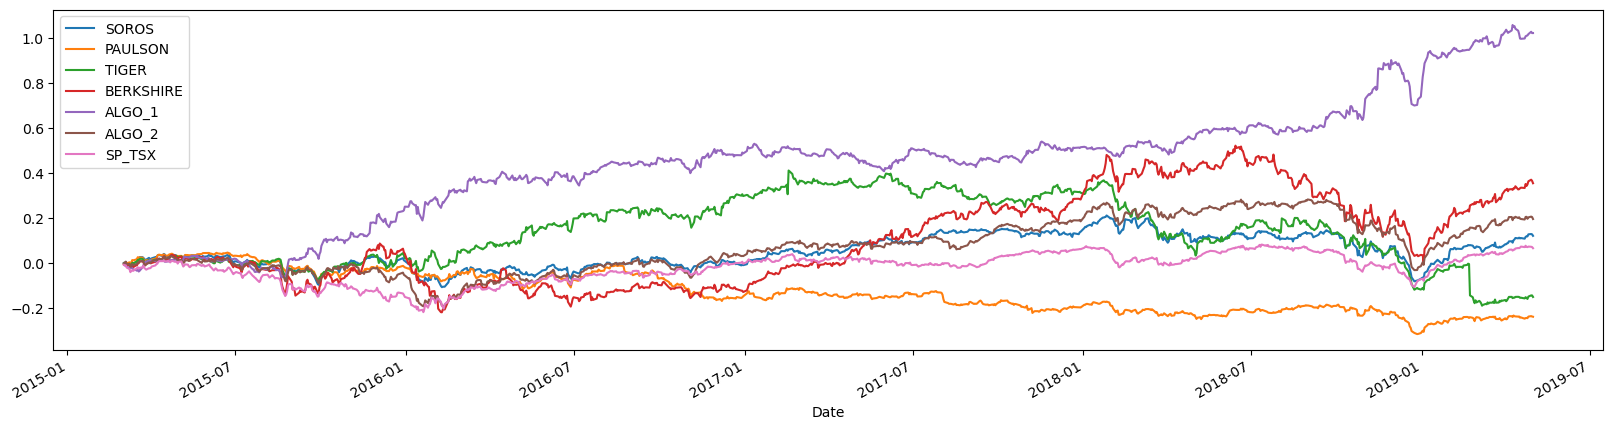

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


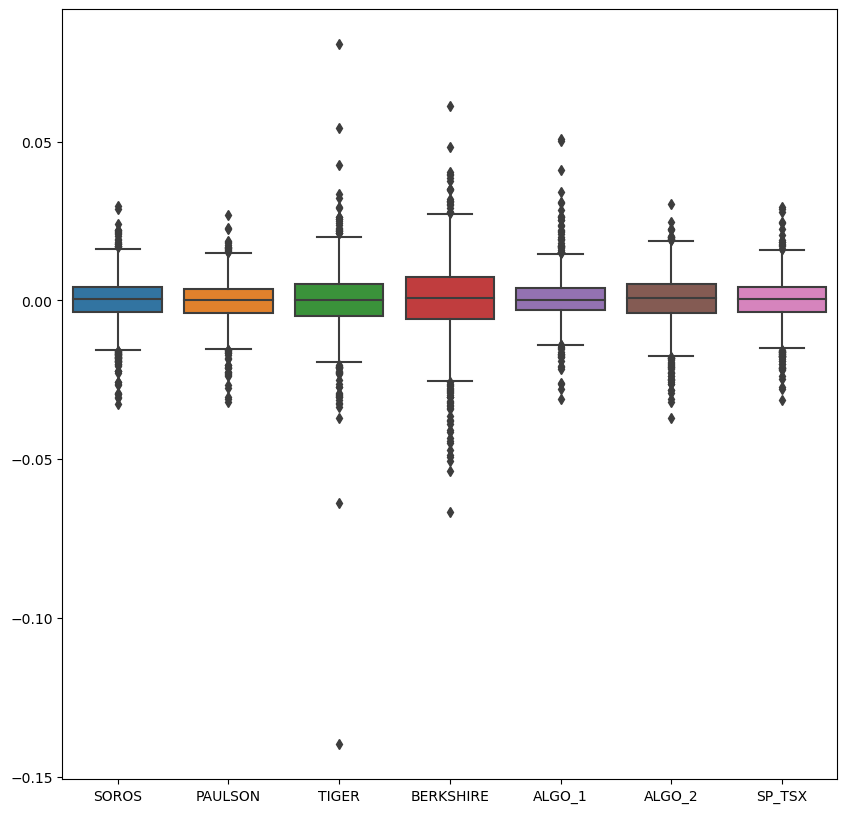

In [19]:
# Box plot to visually show risk
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10,))
ax = sns.boxplot(data=combined_df)

plt.show()

### Calculate Standard Deviations

In [20]:
#Alt 1: Calculate the daily standard deviations of all portfolios
daily_sd_soros = combined_df['SOROS'].std()
daily_sd_paulson = combined_df['PAULSON'].std()
daily_sd_tiger = combined_df['TIGER'].std()
daily_sd_berkshire = combined_df['BERKSHIRE'].std()
daily_sd_algo1 = combined_df['ALGO_1'].std()
daily_sd_algo2 = combined_df['ALGO_2'].std()

print ("Standard Deviation for SOROS portfolio:", round(daily_sd_soros, 5))
print ("Standard Deviation for PAULSON portfolio:", round(daily_sd_paulson, 5))
print ("Standard Deviation for TIGER portfolio:", round(daily_sd_tiger,5))
print ("Standard Deviation for BERKSHIRE portfolio:", round(daily_sd_berkshire, 5))
print ("Standard Deviation for ALGO_1 portfolio:", round(daily_sd_algo1, 5))
print ("Standard Deviation for ALGO_2 portfolio:", round(daily_sd_algo2, 5))

Standard Deviation for SOROS portfolio: 0.00783
Standard Deviation for PAULSON portfolio: 0.00698
Standard Deviation for TIGER portfolio: 0.01088
Standard Deviation for BERKSHIRE portfolio: 0.01283
Standard Deviation for ALGO_1 portfolio: 0.00759
Standard Deviation for ALGO_2 portfolio: 0.00833


In [21]:
#Alt 2: Calculate the daily standard deviations of all portfolios
combined_df_sd = combined_df.std()
combined_df_sd

SOROS        0.007828
PAULSON      0.006982
TIGER        0.010883
BERKSHIRE    0.012826
ALGO_1       0.007589
ALGO_2       0.008326
SP_TSX       0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [22]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_sd_sptsx = combined_df['SP_TSX'].std()

# Using Alt 1: Determine which portfolios are riskier than the S&P TSX 60
sd_dict = {
    "SOROS": daily_sd_soros,
    "PAULSON": daily_sd_paulson, 
    "TIGER": daily_sd_tiger, 
    "BERKSHIRE": daily_sd_berkshire, 
    "ALGO_1": daily_sd_algo1, 
    "ALGO_2": daily_sd_algo2
}

for k, v in sd_dict.items():
    if v > daily_sd_sptsx:
        print('Portfolio', k, 'with standard deviation', round(v, 5), 'is riskier than S&P TSX 60 with standard devation', round(daily_sd_sptsx, 5))

#Source:  https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp

#What Does the Standard Deviation of an Investment Measure?
#Standard Deviation is used as a proxy for risk, as it measures the range of an investment's performance. 
#The greater the standard deviation, the greater the investment's volatility."

Portfolio SOROS with standard deviation 0.00783 is riskier than S&P TSX 60 with standard devation 0.00703
Portfolio TIGER with standard deviation 0.01088 is riskier than S&P TSX 60 with standard devation 0.00703
Portfolio BERKSHIRE with standard deviation 0.01283 is riskier than S&P TSX 60 with standard devation 0.00703
Portfolio ALGO_1 with standard deviation 0.00759 is riskier than S&P TSX 60 with standard devation 0.00703
Portfolio ALGO_2 with standard deviation 0.00833 is riskier than S&P TSX 60 with standard devation 0.00703


### Calculate the Annualized Standard Deviation

In [23]:
#Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = combined_df.std() * np.sqrt(252)

# Sort values in ascending order
volatility = volatility.sort_values()

# Display the values
volatility

PAULSON      0.110841
SP_TSX       0.111664
ALGO_1       0.120470
SOROS        0.124259
ALGO_2       0.132177
TIGER        0.172759
BERKSHIRE    0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

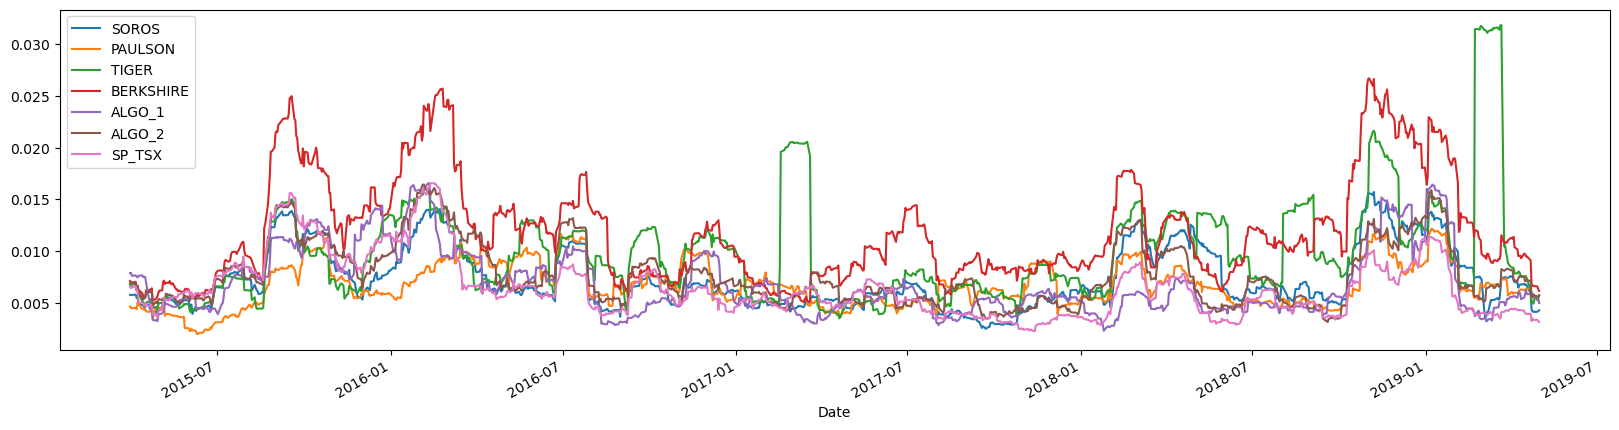

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_roll21days = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_df_roll21days.plot(figsize=(20,5))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

,SOROS,PAULSON,TIGER,BERKSHIRE,ALGO_1,ALGO_2,SP_TSX
SOROS,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
ALGO_1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
ALGO_2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP_TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

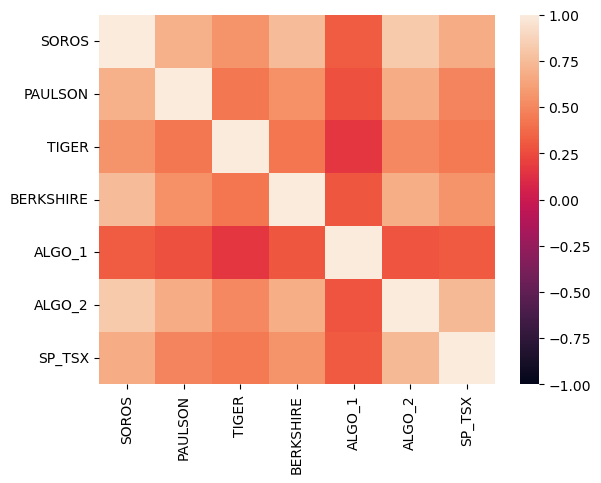

In [26]:
# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [27]:
# Calculate covariance of a single portfolio
# Selected the portfolio TIGER for calculation
covariance = combined_df['TIGER'].cov(combined_df['SP_TSX'])
print ("Covariance of TIGER portfolio is: ", covariance)

Covariance of TIGER portfolio is:  3.372724149435499e-05


<AxesSubplot:title={'center':'Rolling 21-Day Beta of TIGER portfolio'}, xlabel='Date'>

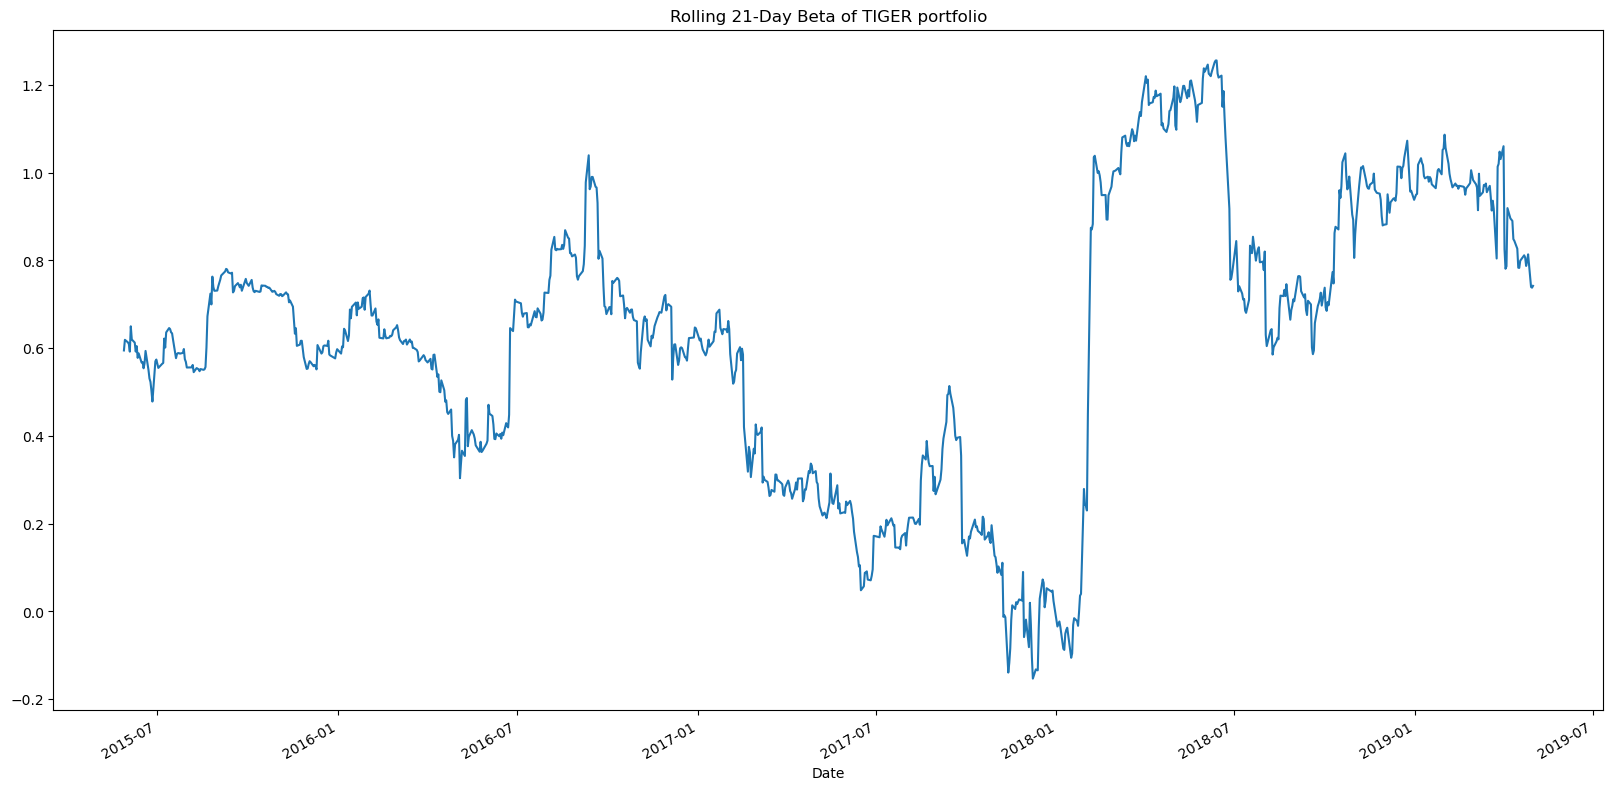

In [28]:
# Plot beta trend for a single portfolio with 60-day rolling beta and the S&P TSX 60
rolling_covariance = combined_df['TIGER'].rolling(window=60).cov(combined_df['SP_TSX'])
rolling_variance = combined_df['SP_TSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 21-Day Beta of TIGER portfolio')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

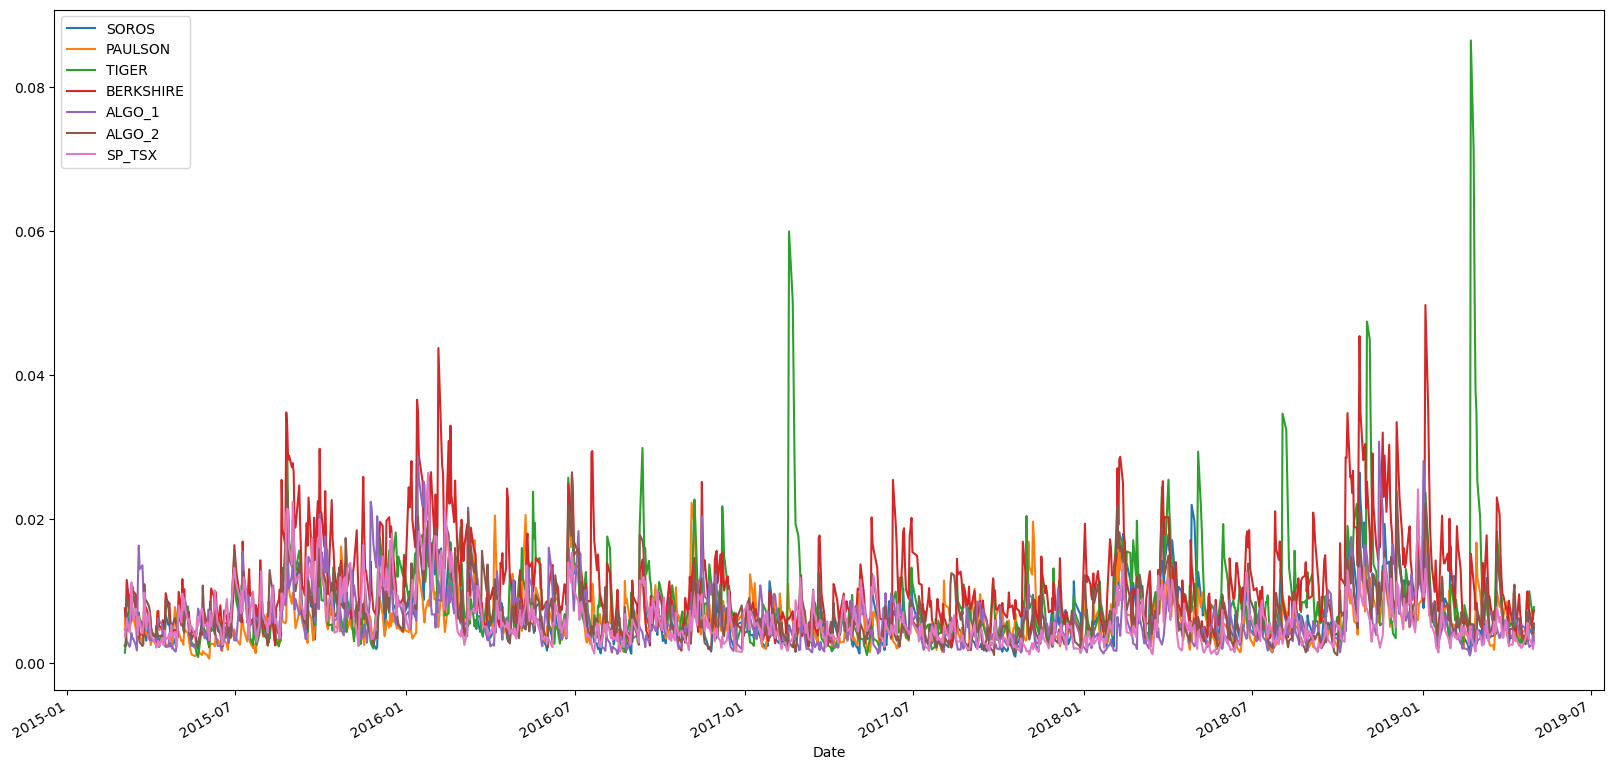

In [29]:
# Use `ewm` to calculate the rolling window

# Convert combined dataframe index to list called 'times'
times = []
times = list(combined_df.index.values)

# Calculate exponentially weighted average using ewm function with halflife of 21 days with metrick of interest: standard deviation. 
combined_ewm = combined_df.ewm(halflife='21 days', times=pd.DatetimeIndex(times)).std()
combined_ewm.plot(figsize=(20, 10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [30]:
# Annualized Sharpe Ratios (Risk Free Rate file obtained from Activities files)
riskfreerate_path= Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/risk_free_rate.csv")
risk_free_rate = pd.read_csv(riskfreerate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

combined_df_rf = pd.concat([combined_df, risk_free_rate], axis='columns', join='inner')

sharpe_ratios_1 = ((combined_df_rf.mean()-combined_df_rf['rf_rate'].mean()) * 252) / (combined_df_rf.std() * np.sqrt(252))
sharpe_ratios_1

SOROS        0.115847
PAULSON     -0.756068
TIGER       -0.284988
BERKSHIRE    0.365945
ALGO_1       1.261160
ALGO_2       0.204389
SP_TSX       0.010658
rf_rate      0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

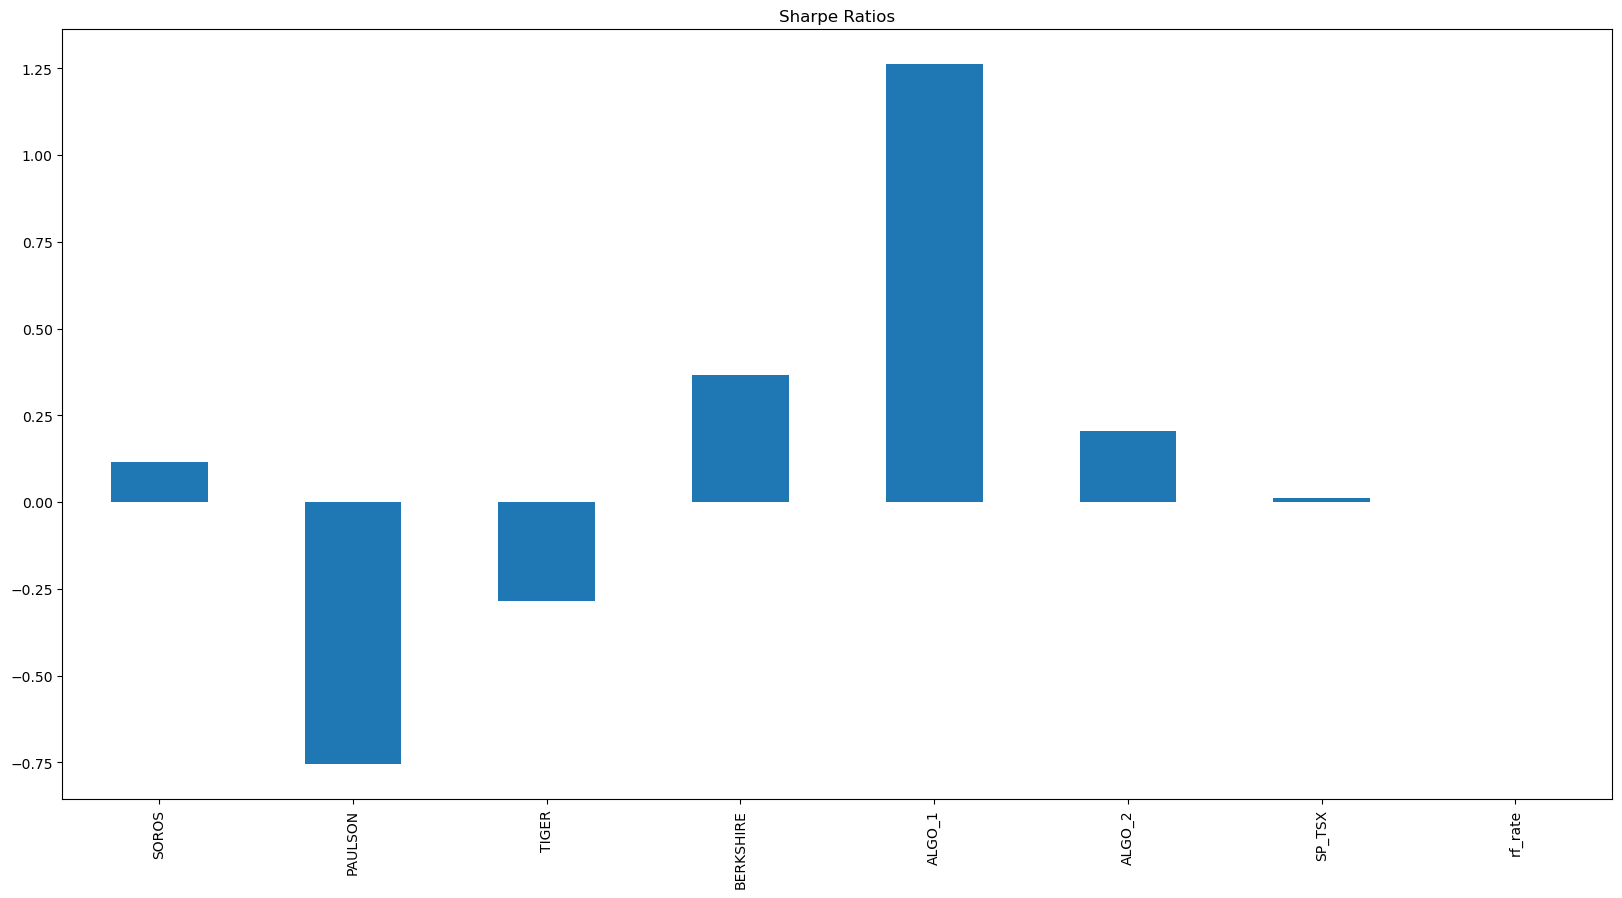

In [31]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_1.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

There are two algorithmic portfolios, namely, ALGO_1 and ALGO_2 in the collection of portfolios examined.

Reviewing the **Cummulative Returns**, ALGO_1 seems to outperform all portfolios include the whale portfolio. ALGO_2 has performed better than the market, S&P TSX 60 but has underperformed when compared to BERKSHIRE portfolio.

Reviewing the **Box Plot** of daily returns for all portfolios, TIGER and BERKSHIRE seem to demonstrate the greatest number of extreme up and down returns (outliers) which speaks to the volatility experienced by these portfolios.  ALGO_1 and ALGO_2 seem to demonstrate fewer outliers which speaks to the stability of the algorithmic portfolios over the timeframe.

Reviewing the **Correlation Matrix**, it is evident that ALGO_1 has a weak linear correlation with other portfolios.  ALGO_2 does have stronger correlation with S&P TSX 60 and SOROS compared to ALGO_1.  This indicates that the stock picks for ALGO_1 portfolio are somewhat unique or different from those selected by other portfolios (inlcuding the "Whale Portfolios") and has outperformed overall.

Finally, Sharpe Ratios compares return of an investment with its risk and generally the higher the Sharpe ratio, the more attractive the risk-adjusted return.  Reviewing the **Sharpe Ratios** shows that ALGO_1 fairs the best when compared to S&P TSX 60 as well as BERKSHIRE portfolio from the "Whale Portfolios". ALGO_2 fairs better than S&P TSX 60, however, it did not 'beat' "Whale Portfolio" BERKSHIRE like ALGO_1.

###### Sharpe Ratio Definition: The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill.  Source: https://www.investopedia.com/terms/s/sharperatio.asp

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Reading data from 1st stock
l = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/l_historical.csv")
l_df = pd.read_csv(l, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.drop(labels=['Symbol'], axis=1, inplace=True)
l_df.rename(columns={'Close' :'L'},inplace=True)
l_df.head()

,L
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [33]:
# Reading data from 2nd stock
otex = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/otex_historical.csv")
otex_df = pd.read_csv(otex, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.drop(labels=['Symbol'], axis=1, inplace=True)
otex_df.rename(columns={'Close' :'OTEX'},inplace=True)
otex_df.head()

,OTEX
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [34]:
# Reading data from 3rd stock
shop = Path("/Users/kiransohi/Documents/Github/Portfolio_Performance/Resources/shop_historical.csv")
shop_df = pd.read_csv(shop, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.drop(labels=['Symbol'], axis=1, inplace=True)
shop_df.rename(columns={'Close' :'SHOP'},inplace=True)
shop_df.head()

,SHOP
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [35]:
# Combine all stocks in a single DataFrame
all_stocks = pd.concat([l_df, otex_df, shop_df], axis="columns", join="inner")
all_stocks

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [36]:
# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks

,Date,L,OTEX,SHOP
0,2018-01-02,57.99,43.58,132.06
1,2018-01-03,57.41,43.07,135.15
2,2018-01-04,57.42,42.91,137.46
3,2018-01-05,57.42,42.57,137.26
4,2018-01-08,56.86,42.16,139.51
...,...,...,...,...
496,2019-12-20,67.90,58.68,513.22
497,2019-12-23,67.68,57.89,511.62
498,2019-12-24,67.67,57.44,525.39
499,2019-12-27,67.78,57.70,534.76


In [37]:
# Reorganize portfolio data by having a column per symbol
df = all_stocks[~(all_stocks['Date'] < '2019-01-01')]
df = df.reset_index()
df = df.drop(columns=['index']).copy()
all_stocks_df = df.set_index('Date')
all_stocks_df

,L,OTEX,SHOP
Date,,,
2019-01-02,61.05,44.05,187.11
2019-01-03,60.67,42.44,174.91
2019-01-04,60.80,43.20,184.98
2019-01-07,61.37,43.57,191.91
2019-01-08,61.85,44.79,193.21
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [38]:
# Calculate daily returns
all_stock_retdf = all_stocks_df.pct_change()

# Drop NAs
all_stock_retdf = all_stock_retdf.dropna().copy()

# Display sample data
all_stock_retdf.head()

,L,OTEX,SHOP
Date,,,
2019-01-03,-0.006224,-0.036549,-0.065202
2019-01-04,0.002143,0.017908,0.057572
2019-01-07,0.009375,0.008565,0.037464
2019-01-08,0.007821,0.028001,0.006774
2019-01-09,0.010186,0.008707,0.016304


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = all_stock_retdf.dot(weights)

# Display sample data
portfolio_returns.head()

Date
2019-01-03   -0.035992
2019-01-04    0.025874
2019-01-07    0.018468
2019-01-08    0.014199
2019-01-09    0.011732
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
allstockret_portret_df = pd.concat([all_stock_retdf, portfolio_returns], axis="columns", join="inner")
allstockret_portret_df.rename( columns={0 :'PORTFOLIO'}, inplace=True )
allstockret_portret_df.head()

,L,OTEX,SHOP,PORTFOLIO
Date,,,,
2019-01-03,-0.006224,-0.036549,-0.065202,-0.035992
2019-01-04,0.002143,0.017908,0.057572,0.025874
2019-01-07,0.009375,0.008565,0.037464,0.018468
2019-01-08,0.007821,0.028001,0.006774,0.014199
2019-01-09,0.010186,0.008707,0.016304,0.011732


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allstockret_portret_df = allstockret_portret_df.dropna().copy()
allstockret_portret_df

,L,OTEX,SHOP,PORTFOLIO
Date,,,,
2019-01-03,-0.006224,-0.036549,-0.065202,-0.035992
2019-01-04,0.002143,0.017908,0.057572,0.025874
2019-01-07,0.009375,0.008565,0.037464,0.018468
2019-01-08,0.007821,0.028001,0.006774,0.014199
2019-01-09,0.010186,0.008707,0.016304,0.011732
...,...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503,0.007495
2019-12-23,-0.003240,-0.013463,-0.003118,-0.006607
2019-12-24,-0.000148,-0.007773,0.026915,0.006331


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
all_stockport_daily_std = allstockret_portret_df.std()
all_stockport_daily_std = all_stockport_daily_std.sort_values(ascending=False)
annualized_std = all_stockport_daily_std * np.sqrt(252)
annualized_std.head()

SHOP         0.425961
PORTFOLIO    0.190467
OTEX         0.186209
L            0.127925
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

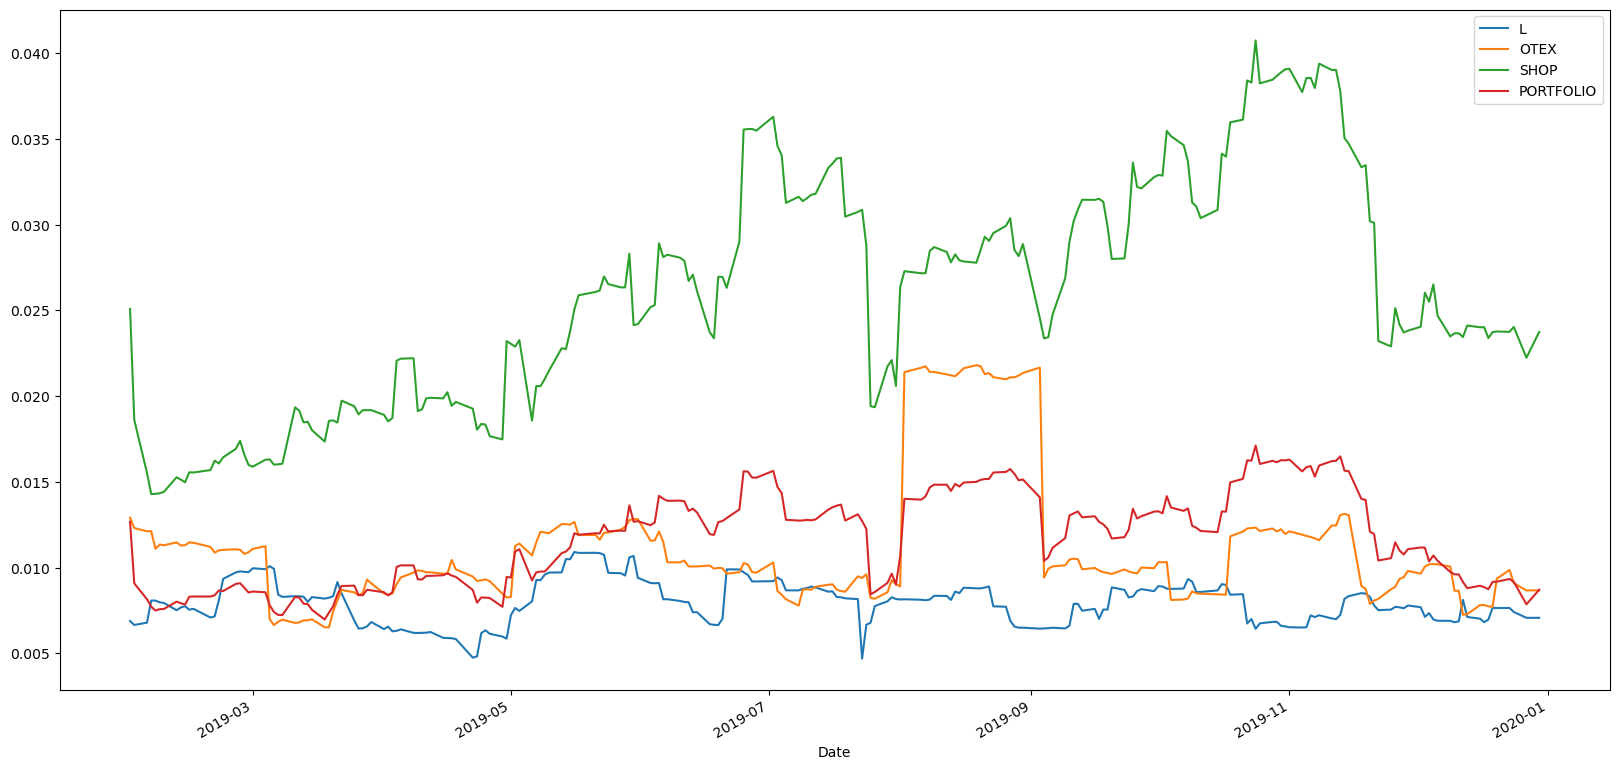

In [43]:
# Calculate rolling standard deviation
all_stockport_daily_rollstd = allstockret_portret_df.rolling(window=21).std()

# Plot rolling standard deviation
all_stockport_daily_rollstd.plot(figsize=(20, 10))

### Calculate and plot the correlation

                  L      OTEX      SHOP  PORTFOLIO
L          1.000000  0.208977  0.160673   0.411759
OTEX       0.208977  1.000000  0.419515   0.685404
SHOP       0.160673  0.419515  1.000000   0.918153
PORTFOLIO  0.411759  0.685404  0.918153   1.000000


<AxesSubplot:>

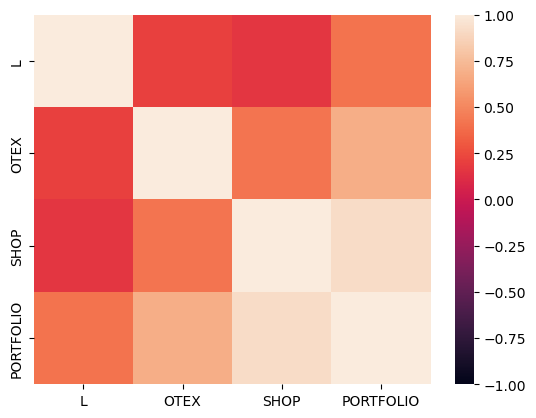

In [44]:
# Calculate and plot the correlation
all_stockport_correlation = allstockret_portret_df.corr()
print (all_stockport_correlation)

# Display the correlation matrix
sns.heatmap(all_stockport_correlation, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [45]:
# Calculate and plot Beta
# Join S&P 60 TSX returns data from sp_tsx_ret dataframe to the all stock return and portfolio returns dataframe
all_stockportsptsx60_df = pd.concat([allstockret_portret_df, sp_tsx_ret], axis="columns", join="inner")
all_stockportsptsx60_df.head()

,L,OTEX,SHOP,PORTFOLIO,SP_TSX
Date,,,,,
2019-01-03,-0.006224,-0.036549,-0.065202,-0.035992,-0.009368
2019-01-04,0.002143,0.017908,0.057572,0.025874,0.015048
2019-01-07,0.009375,0.008565,0.037464,0.018468,0.005373
2019-01-08,0.007821,0.028001,0.006774,0.014199,0.006965
2019-01-09,0.010186,0.008707,0.016304,0.011732,0.013665


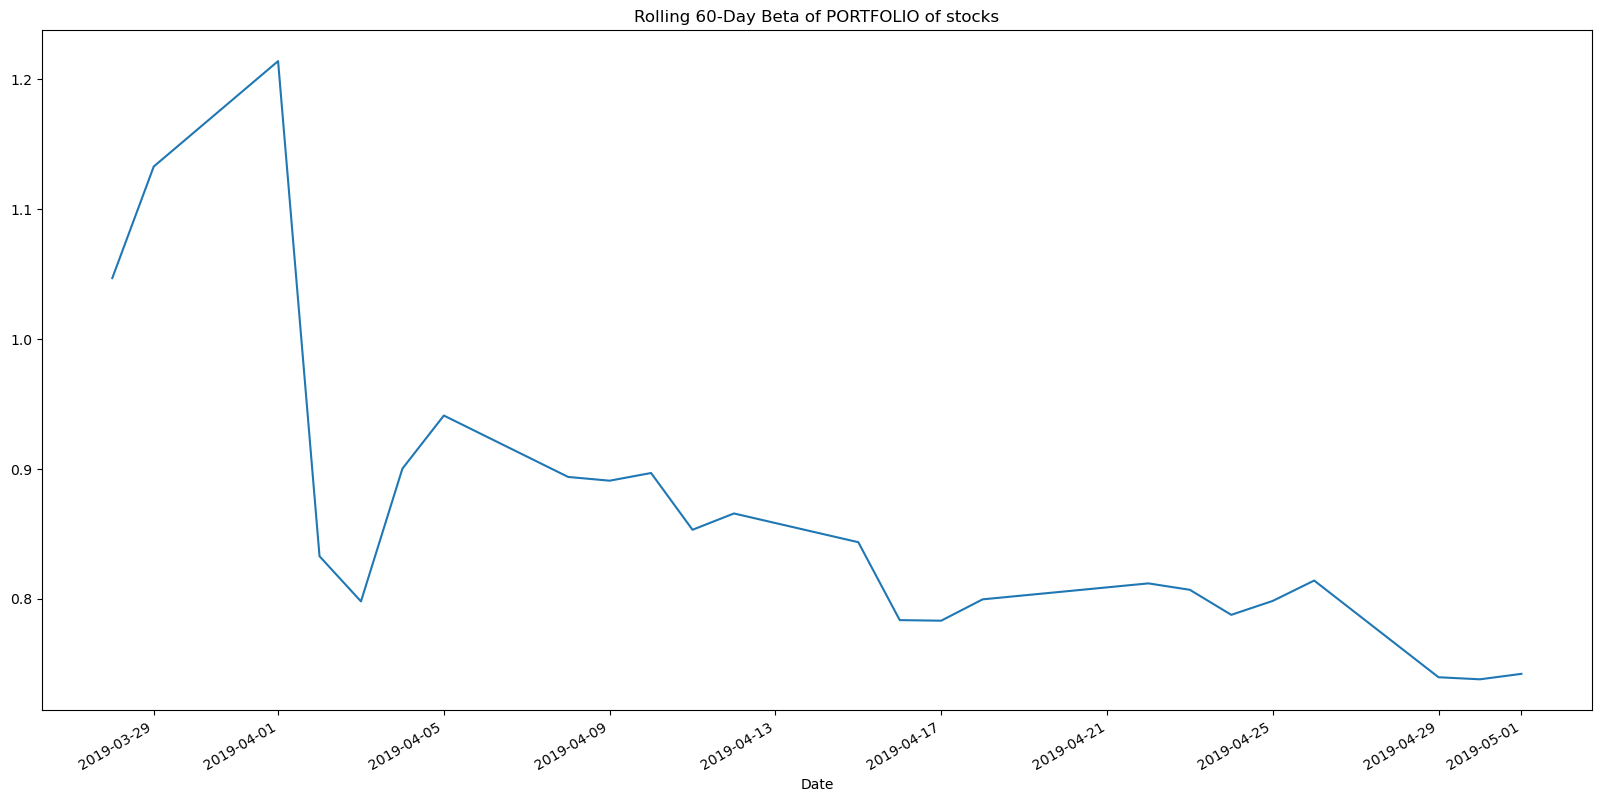

In [46]:
# Calculate covariance of portfolio
rolling_port_covariance = all_stockportsptsx60_df['PORTFOLIO'].rolling(window=60).cov(all_stockportsptsx60_df['SP_TSX'])

# Calculate variance of S&P TSX
rolling_variance = all_stockportsptsx60_df['SP_TSX'].rolling(window=60).var()

# Computing beta
rolling_portfolio_beta = rolling_covariance / rolling_variance

# Plot beta
ax = rolling_portfolio_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of PORTFOLIO of stocks")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
all_stockportsptsx60rf_df = pd.concat([all_stockportsptsx60_df, risk_free_rate], axis='columns', join='inner')
all_stockportsptsx60rf_df.head()

,L,OTEX,SHOP,PORTFOLIO,SP_TSX,rf_rate
Date,,,,,,
2019-01-03,-0.006224,-0.036549,-0.065202,-0.035992,-0.009368,0.000262
2019-01-04,0.002143,0.017908,0.057572,0.025874,0.015048,0.000263
2019-01-07,0.009375,0.008565,0.037464,0.018468,0.005373,0.000268
2019-01-08,0.007821,0.028001,0.006774,0.014199,0.006965,0.000268
2019-01-09,0.010186,0.008707,0.016304,0.011732,0.013665,0.000267


In [48]:
sharpe_ratios_2 = ((all_stockportsptsx60rf_df.mean()-all_stockportsptsx60rf_df['rf_rate'].mean()) * 252) / (all_stockportsptsx60rf_df.std() * np.sqrt(252))
sharpe_ratios_2

L            0.348407
OTEX         1.101714
SHOP         2.426372
PORTFOLIO    2.246930
SP_TSX       1.533642
rf_rate      0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

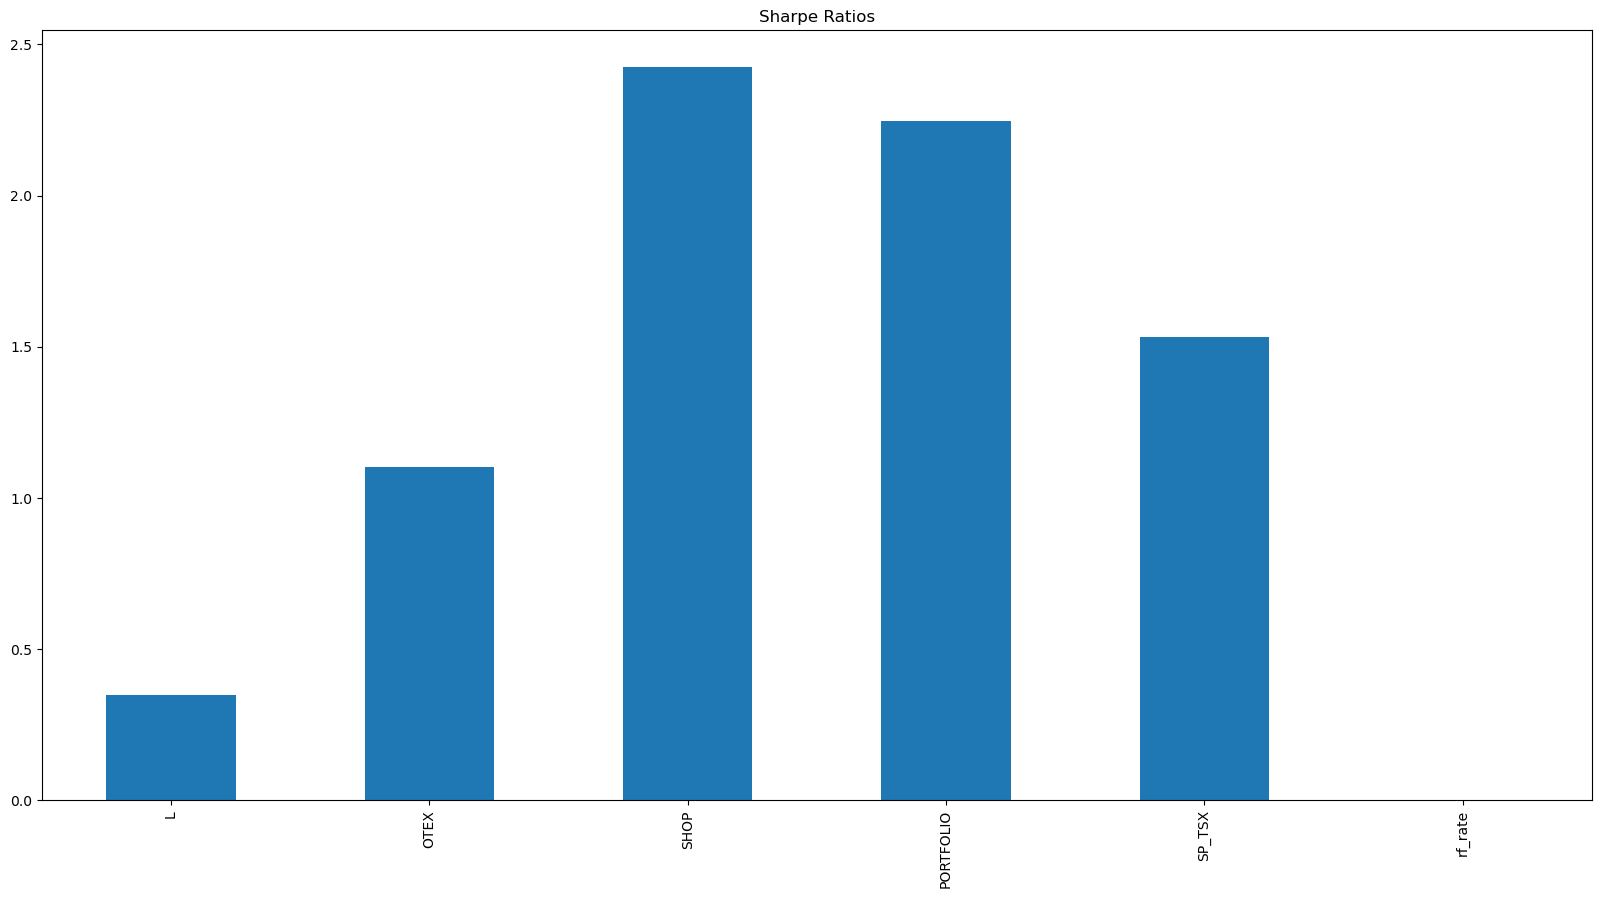

In [49]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2.plot(figsize=(20, 10), kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Compared to S&P TSX 60, the PORTFOLIO faired quiet well over the year 2019, however Shopify (SHOP) seems to have outperformed the PORTFOLIO overall.  Nonetheless, a diversified porfolio is a safe bet over longer investment periods to absorb the risk of downturns or market volatility.

Sources:

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
* https://stackoverflow.com/
* https://www.investopedia.com/terms/s/sharperatio.asp
* https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp
* https://www.investopedia.com/terms/b/beta.asp#:~:text=Beta%20(%CE%B2)%20is%20a%20measure,volatile%20than%20the%20S%26P%20500.